In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from tqdm.notebook import tqdm_notebook
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
#from profanity_check import predict, predict_prob
import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#from textblob import TextBlob
import emoji
import itertools 
import matplotlib.style as style
#from google.colab import files
style.use('ggplot')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### converting text file to csv file

In [2]:
def valid_user(str):
    if len(str.split(' ')) < 5 and not 'left' in str and not 'added' in str and not 'removed' in str:
        return True
    elif '+91' in str and len(str.split(' ')) <= 3:
        return True
    return False

In [3]:
def vali_date(text):
    try:
        datetime.datetime.strptime(text, '%m/%d/%y')
        return True
    except Exception as e:
        return False

lines = []
with open(r'C:\\Users\\hp\\Downloads\\WhatsApp Chat with Crisp .txt',encoding="utf8") as f:
    for line in f:
        if vali_date(line.split(',')[0]):
             lines.append(line.strip('\n'))
        else:
             lines[len(lines) - 1] += ' ' + line.strip('\n')
  
datetimes, names, msgs = ([] for i in range(3))
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%m/%d/%y, %I:%M %p '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))

df = pd.DataFrame()
df['datetime'] = datetimes
df['name'] = names
df['msg'] = msgs

'''
The file  had lines for when the group names were changed, and when people left or were removed. 
I will remove these since they are of no use. One more friend changed his number, and to include that, 
I had to do a little bit more filtering. 
'''

def valid_user(str):
    if len(str.split(' ')) < 5 and not 'left' in str and not 'added' in str and not 'removed' in str and not 'admin' in str:
        return True
    elif '+91' in str and len(str.split(' ')) <= 3:
        return True
    return False


df = df[df['name'].apply(valid_user)]
df.loc[(df.name == '<redacted>'), 'name'] = 'MM' 
df.loc[(df.name == '<redacted>'), 'name'] = 'MM' 
df.loc[(df.name == '<redacted>'), 'name'] = 'SD' 
df.loc[(df.name == '<redacted>'), 'name'] = 'BA'
df.loc[(df.name == '<redacted>'), 'name'] = 'RF'
df.loc[(df.name == '<redacted>'), 'name'] = 'SJ'
df.loc[(df.name == '<redacted>'), 'name'] = 'GJ'
df.loc[(df.name == '<redacted>'), 'name'] = 'BD'
df.loc[(df.name == '<redacted>'), 'name'] = 'SM'
df = df[df['name'] != '<redacted>']
df['name'].unique()

df['date'] = df['datetime'].apply(lambda x: x.date())
df['day_sent'] = df['datetime'].dt.strftime('%a')
df['month_sent'] = df['datetime'].dt.strftime('%b')
df['year_sent'] = df['datetime'].dt.year
df['count'] = 1 # To groupby days and have a count of how many messages were sent per day
df = df[~df['msg'].apply(lambda x: True if '\xa0' in x else False)] # To remove characters with '\xa0'
print(df.shape)

  0%|          | 0/80 [00:00<?, ?line/s]

(76, 8)


In [4]:
def vali_date(text):
    try:
        datetime.datetime.strptime(text, '%d/%m/%y')
        return True
    except Exception as e:
        return False

lines = []
with open('C:\\Users\\hp\\Downloads\\WhatsApp Chat with Crisp .txt',encoding="utf8") as f:
    for line in f:
        if vali_date(line.split(',')[0]):
            lines.append(line.strip('\n'))
        else:
            lines[len(lines) - 1] += ' ' + line.strip('\n')
  
datetimes, names, msgs = ([] for i in range(3))
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%d/%m/%y, %I:%M %p '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))

df2 = pd.DataFrame()
df2['datetime'] = datetimes
df2['name'] = names
df2['msg'] = msgs


df2 = df2[df2['name'].apply(valid_user)]
df2.loc[(df2.name == '<redacted>'), 'name'] = 'MM' 
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SD' 
df2.loc[(df2.name == '<redacted>'), 'name'] = 'BA'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'RF'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SJ'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'GJ'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'BD'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SM'
df2 = df2[df2['name'] != '<redacted>']
df2['name'].unique()

df2['day_sent'] = df2['datetime'].dt.strftime('%a')
df2['month_sent'] = df2['datetime'].dt.strftime('%b')
df2['year_sent'] = df2['datetime'].dt.year
df2['date'] = df2['datetime'].apply(lambda x: x.date())
df2['count'] = 1 # To groupby days and have a count of how many messages were sent per day
df2 = df2[~df2['msg'].apply(lambda x: True if '\xa0' in x else False)] # To remove characters with '\xa0'
print(df2.shape)

df = pd.concat([df, df2]).drop_duplicates().reset_index(drop = True)
df = df.sort_values(by = 'datetime')
print(df.shape)
df.head()

  0%|          | 0/161 [00:00<?, ?line/s]

(155, 8)
(224, 8)


,datetime,name,msg,date,day_sent,month_sent,year_sent,count
0,2021-07-12 19:56:00,Riya Crisp Python Bhopal,Mam it's not possible for me to come tomorrow,2021-07-12,Mon,Jul,2021,1
1,2021-07-12 20:22:00,Ritu Maam Crisp. Python,Ok,2021-07-12,Mon,Jul,2021,1
2,2021-07-12 20:32:00,mnazish19,Maam. i'll also Not come.,2021-07-12,Mon,Jul,2021,1
3,2021-07-12 20:32:00,Ritu Maam Crisp. Python,Ok,2021-07-12,Mon,Jul,2021,1
4,2021-09-12 23:56:00,Ritu Maam Crisp. Python,<Media omitted>,2021-09-12,Sun,Sep,2021,1


In [5]:
df.tail()

,datetime,name,msg,date,day_sent,month_sent,year_sent,count
24,2022-12-01 18:56:00,Cirsp Student Python,Plz resend the Maths classes links,2022-12-01,Thu,Dec,2022,1
28,2022-12-01 19:00:00,mnazish19,"<Media omitted> 14/01/22, 1231 pm",2022-12-01,Thu,Dec,2022,1
27,2022-12-01 19:00:00,mnazish19,https//www.w3schools.com/python/numpy/numpy_r...,2022-12-01,Thu,Dec,2022,1
26,2022-12-01 19:00:00,mnazish19,https//www.geeksforgeeks.org/python,2022-12-01,Thu,Dec,2022,1
25,2022-12-01 19:00:00,mnazish19,meet.google.com/pzf,2022-12-01,Thu,Dec,2022,1


In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
#from heatmap import heatmap
#from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
#from plotly import express as px

In [7]:
df.shape

(224, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 25
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    224 non-null    datetime64[ns]
 1   name        224 non-null    object        
 2   msg         224 non-null    object        
 3   date        224 non-null    object        
 4   day_sent    224 non-null    object        
 5   month_sent  224 non-null    object        
 6   year_sent   224 non-null    int64         
 7   count       224 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 15.8+ KB


In [9]:
df.isnull().sum()

datetime      0
name          0
msg           0
date          0
day_sent      0
month_sent    0
year_sent     0
count         0
dtype: int64

In [10]:
#checking no. of names in group
df['name'].nunique()

4

In [11]:
#checking names in group
df['name'].unique()

array(['Riya Crisp Python Bhopal', 'Ritu Maam Crisp. Python', 'mnazish19',
       'Cirsp Student Python'], dtype=object)

In [12]:
### Counting number of letters in each message
df['Letter\'s'] = df['msg'].apply(lambda s : len(s))
df['Letter\'s']

0     46
1      3
2     26
3      3
4     16
      ..
24    35
28    35
27    62
26    36
25    20
Name: Letter's, Length: 224, dtype: int64

In [13]:
### Counting number of word's in each message
df['Word\'s'] = df['msg'].apply(lambda s : len(s.split(' ')))
df['Word\'s']

0     10
1      2
2      6
3      2
4      3
      ..
24     7
28     7
27     2
26     2
25     2
Name: Word's, Length: 224, dtype: int64

In [14]:
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https)'
df['Url_Count'] = df.msg.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
links 

35

In [15]:
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.msg.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
media

26

In [16]:
### Looking updated dataset
df

,datetime,name,msg,date,day_sent,month_sent,year_sent,count,Letter's,Word's,Url_Count,Media_Count
0,2021-07-12 19:56:00,Riya Crisp Python Bhopal,Mam it's not possible for me to come tomorrow,2021-07-12,Mon,Jul,2021,1,46,10,0,0
1,2021-07-12 20:22:00,Ritu Maam Crisp. Python,Ok,2021-07-12,Mon,Jul,2021,1,3,2,0,0
2,2021-07-12 20:32:00,mnazish19,Maam. i'll also Not come.,2021-07-12,Mon,Jul,2021,1,26,6,0,0
3,2021-07-12 20:32:00,Ritu Maam Crisp. Python,Ok,2021-07-12,Mon,Jul,2021,1,3,2,0,0
4,2021-09-12 23:56:00,Ritu Maam Crisp. Python,<Media omitted>,2021-09-12,Sun,Sep,2021,1,16,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24,2022-12-01 18:56:00,Cirsp Student Python,Plz resend the Maths classes links,2022-12-01,Thu,Dec,2022,1,35,7,0,0
28,2022-12-01 19:00:00,mnazish19,"<Media omitted> 14/01/22, 1231 pm",2022-12-01,Thu,Dec,2022,1,35,7,0,1
27,2022-12-01 19:00:00,mnazish19,https//www.w3schools.com/python/numpy/numpy_r...,2022-12-01,Thu,Dec,2022,1,62,2,1,0
26,2022-12-01 19:00:00,mnazish19,https//www.geeksforgeeks.org/python,2022-12-01,Thu,Dec,2022,1,36,2,1,0


### Extracting basic statistics from the dataset : 

In [17]:
total_messages = df.shape[0]
media_messages = media
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 224
Total Number of Media Messages : 26
Total Number of Links : 35


### Let’s print the total no. of messages sent by each user : 

In [18]:
### Creates a list of unique Authors
l = df.name.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["name"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Riya Crisp Python Bhopal   ->   22
Ritu Maam Crisp. Python   ->   149
mnazish19   ->   41
Cirsp Student Python   ->   12


### Let’s print total messages sent on each day of the week :

In [19]:
l = df.day_sent.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["day_sent"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Mon   ->   50
Sun   ->   20
Tue   ->   36
Thu   ->   39
Fri   ->   37
Wed   ->   17
Sat   ->   25


### Let’s check who is the mostly active author of the group : 

In [27]:
mostly_active = df['name'].value_counts()
mostly_active

Ritu Maam Crisp. Python     149
mnazish19                    41
Riya Crisp Python Bhopal     22
Cirsp Student Python         12
Name: name, dtype: int64

<AxesSubplot:xlabel='name', ylabel='count'>

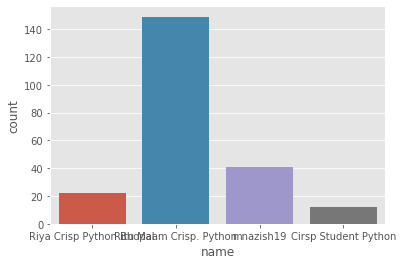

In [28]:
sns.countplot(df['name'])

### Let’s check mostly active day in a week :

In [29]:
active_day = df['day_sent'].value_counts()
active_day

Mon    50
Thu    39
Fri    37
Tue    36
Sat    25
Sun    20
Wed    17
Name: day_sent, dtype: int64

<AxesSubplot:xlabel='day_sent', ylabel='count'>

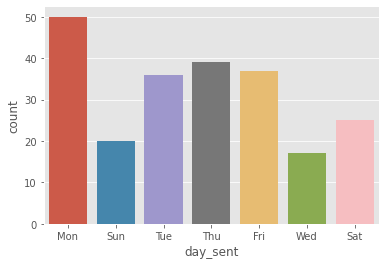

In [31]:
sns.countplot(df['day_sent'])

In [33]:
# Analysis of members who has used max. no. of words in his/her messages
max_words = df[['name','Word\'s']].groupby('name').sum()
m_w = max_words.sort_values('Word\'s',ascending=False)
m_w

,Word's
name,
Ritu Maam Crisp. Python,1082
mnazish19,154
Riya Crisp Python Bhopal,119
Cirsp Student Python,46


### Let’s check author who has shared maximum no. of links in the group: 

In [24]:
### Member who has shared max numbers of link in Group 
max_number = df[['name','Url_Count']].groupby('name').sum()
m_n = max_number.sort_values('Url_Count',ascending=False)
m_n

,Url_Count
name,
Ritu Maam Crisp. Python,29
mnazish19,4
Cirsp Student Python,2
Riya Crisp Python Bhopal,0


### Let’s check the time whenever the group was highly active : 

In [36]:
time = df['datetime'].value_counts().head(20)
time.head()

2022-01-31 16:23:00    4
2022-01-12 19:00:00    4
2022-12-01 19:00:00    4
2021-12-24 10:34:00    3
2022-01-03 10:16:00    3
Name: datetime, dtype: int64

<AxesSubplot:xlabel='datetime', ylabel='count'>

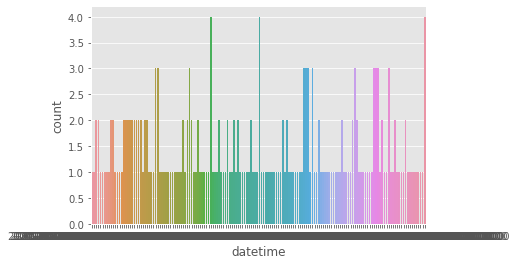

In [37]:
sns.countplot(df['datetime'])

### Let’s check the date on which our group was highly active

In [38]:
date=df['date'].value_counts()
date.head()


2021-12-16    17
2022-01-02    13
2022-02-01    13
2022-01-31    10
2021-12-24    10
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='count'>

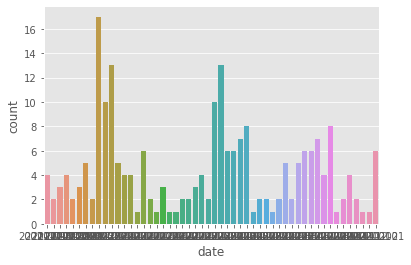

In [39]:
sns.countplot(df['date'])

### Let’s check mostly active month :

In [40]:
active_month = df['month_sent'].value_counts()
active_month

Jan    64
Feb    55
Dec    49
Jul    16
Mar    11
Oct     9
May     7
Apr     6
Sep     4
Nov     2
Aug     1
Name: month_sent, dtype: int64

<AxesSubplot:xlabel='month_sent', ylabel='count'>

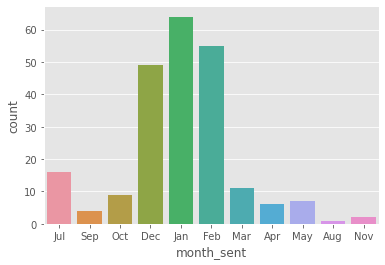

In [41]:
sns.countplot(df['month_sent'])